## Import Libraries

In [ ]:
!pip install scikit-plot

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.compose import  ColumnTransformer

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline,make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score

import scikitplot as skplt

## Import Dataset

In [ ]:
file_path_train = "/content/drive/MyDrive/Colab Notebooks/Data Sets/Loan_Prediction_train.csv"

df_train = pd.read_csv(file_path_train)
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Assessing Dataset

In [ ]:
# return the shape of the data
df_train.shape

(614, 13)

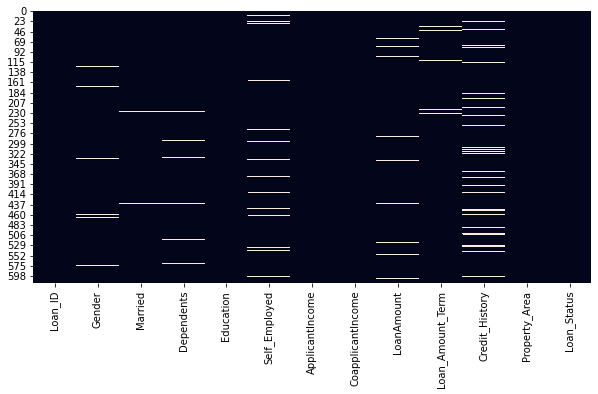

In [ ]:
# Visualizing the patterns of missing value
plt.figure(figsize=(10,5))
sns.heatmap(df_train.isnull(), cbar=False);

In [ ]:
# return the Null data
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# return the percentage of null values
df_train.isnull().mean() * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [ ]:
# check the type of the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# return the unique values of string data
string_columns = df_train.select_dtypes(include=['object']).columns
for col in string_columns[1:]:
    print(col, df_train[col].unique())

Gender ['Male' 'Female' nan]
Married ['No' 'Yes' nan]
Dependents ['0' '1' '2' '3+' nan]
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes' nan]
Property_Area ['Urban' 'Rural' 'Semiurban']
Loan_Status ['Y' 'N']


In [ ]:
# return the unique values
print(df_train['Credit_History'].unique())
print(df_train['Loan_Amount_Term'].unique())

[ 1.  0. nan]
[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]


In [ ]:
# return the value count of string data
for col in string_columns[1:]:
    print(col, df_train[col].value_counts())
    print('='*55)

Gender Male      489
Female    112
Name: Gender, dtype: int64
Married Yes    398
No     213
Name: Married, dtype: int64
Dependents 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed No     500
Yes     82
Name: Self_Employed, dtype: int64
Property_Area Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Loan_Status Y    422
N    192
Name: Loan_Status, dtype: int64


In [ ]:
# return the value count
print(df_train['Credit_History'].value_counts())
print('='*55)
print(df_train['Loan_Amount_Term'].value_counts())

1.0    475
0.0     89
Name: Credit_History, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [ ]:
# check if there is imbalance in data
df_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

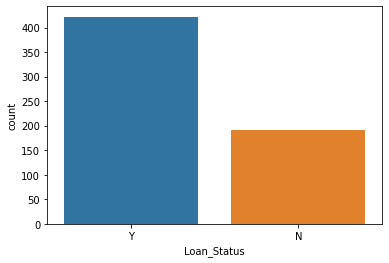

In [ ]:
# graph the loan status
sns.countplot(data = df_train, x = 'Loan_Status');

In [ ]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


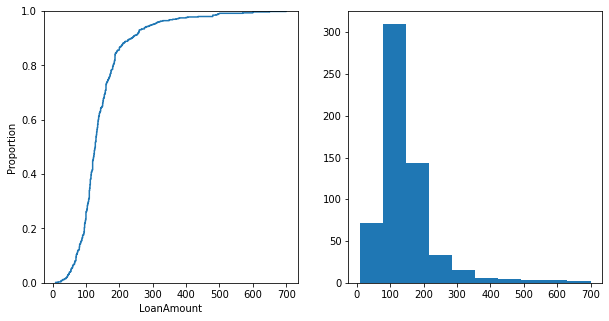

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.ecdfplot(x=df_train['LoanAmount']);
plt.subplot(122)
plt.hist(data = df_train, x = 'LoanAmount');

[3812.5 9459.9]


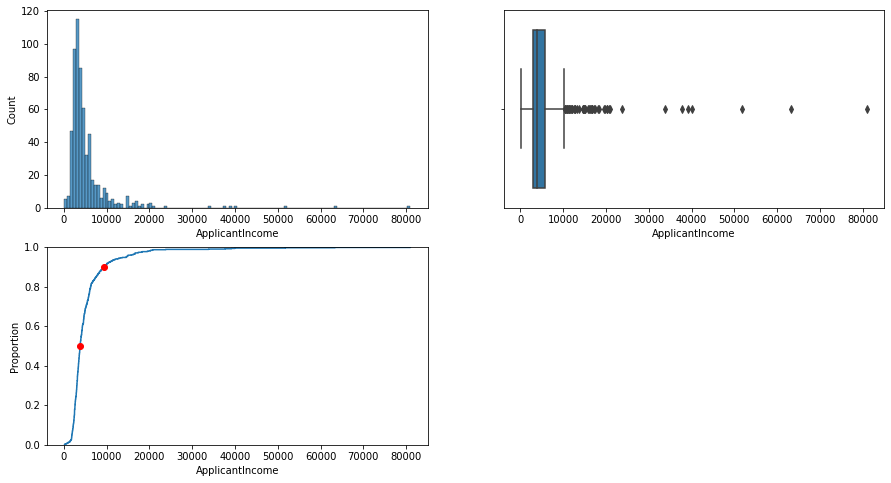

In [ ]:
# check if there is outliers in ApplicantIncome
plt.figure(figsize=(15,8))

plt.subplot(221)
sns.histplot(data=df_train, x="ApplicantIncome");

plt.subplot(222)
sns.boxplot(data=df_train, x="ApplicantIncome");

plt.subplot(223)
percentiles = np.array([50 , 90])
pct_val = np.percentile(df_train['ApplicantIncome'], percentiles)
print(pct_val)
sns.ecdfplot(data=df_train, x="ApplicantIncome");
plt.plot(pct_val, (percentiles/100), marker='o', color='red', linestyle='none');

In [ ]:
df_train['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [ ]:
df_train[df_train['ApplicantIncome']<= 9459.9].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,552.000000,552.000000,533.000000,538.000000,505.000000
mean,4000.994565,1722.744420,132.506567,342.044610,0.837624
std,1752.768608,3002.696526,58.629095,65.931387,0.369161
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2717.750000,0.000000,100.000000,360.000000,1.000000
50%,3597.500000,1427.500000,123.000000,360.000000,1.000000
75%,4918.500000,2367.500000,158.000000,360.000000,1.000000
max,9357.000000,41667.000000,495.000000,480.000000,1.000000


In [ ]:
df_train[df_train['ApplicantIncome']> 9459.9].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,62.000000,62.000000,59.000000,62.000000,59.000000
mean,17889.919355,717.580645,272.033898,341.612903,0.881356
std,13077.549834,1919.872448,159.004117,58.089630,0.326145
min,9504.000000,0.000000,40.000000,180.000000,0.000000
25%,10770.750000,0.000000,162.000000,360.000000,1.000000
50%,14583.000000,0.000000,225.000000,360.000000,1.000000
75%,17998.750000,0.000000,354.500000,360.000000,1.000000
max,81000.000000,10968.000000,700.000000,480.000000,1.000000


In [ ]:
df_train[df_train['ApplicantIncome']> 9459.90].groupby('Loan_Status').count()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,,
N,20,20,20,20,20,20,20,20,19,20,19,20
Y,42,38,41,40,42,40,42,42,40,42,40,42


[nan nan]


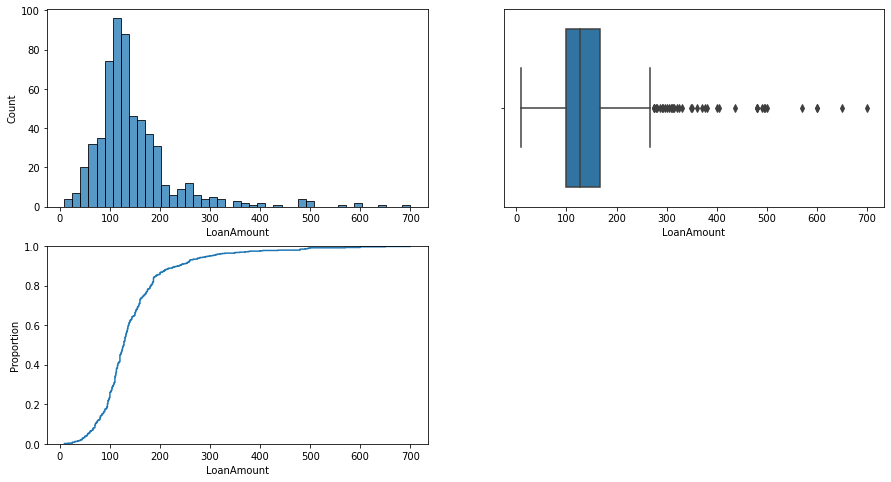

In [ ]:
# check if there is outliers in ApplicantIncome
plt.figure(figsize=(15,8))

plt.subplot(221)
sns.histplot(data=df_train, x="LoanAmount");

plt.subplot(222)
sns.boxplot(data=df_train, x="LoanAmount");

plt.subplot(223)
percentiles = np.array([50 , 85])
pct_val = np.percentile(df_train['LoanAmount'], percentiles)
print(pct_val)
sns.ecdfplot(data=df_train, x="LoanAmount");
plt.plot(pct_val, (percentiles/100), marker='o', color='red', linestyle='none');

In [ ]:
df_train[df_train['LoanAmount']> 200].describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,80.000000,80.000000,80.000000,80.000000,71.000000
mean,12038.962500,2890.337500,311.762500,348.750000,0.845070
std,12762.366266,5560.832799,114.753036,44.873239,0.364413
min,416.000000,0.000000,201.000000,180.000000,0.000000
25%,5936.500000,0.000000,235.500000,360.000000,1.000000
50%,8616.000000,120.000000,266.000000,360.000000,1.000000
75%,13302.750000,4236.500000,349.250000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
df_train[df_train['Loan_Status'] == 0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


## Observation


* There is missing value in `Gender` ►           $13$
* There is missing value in `Married` ►           $3$
* There is missing value in `Dependents` ►       $15$
* There is missing value in `Self_Employed` ►    $32$
* There is missing value in `LoanAmount` ►       $22$
* There is missing value in `Loan_Amount_Term` ► $14$
* There is missing value in `Credit_History` ►   $50$
* Remove `Loan_ID` column
* The missing values are Missing completely at random
* May be there is Unbalance dataset
* Change `Loan_Amount_Term` and `Credit_History` to `object`
* Change `ApplicantIncome` to `float`



## Data Wrangling 

In [ ]:
# Define: remove Loan_id column
df_train.drop(['Loan_ID'], axis=1, inplace=True)

# check
print(df_train.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [ ]:
# Define: deal with missing values

freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

freq_feature = ['Gender', 'Married', 'Dependents', 'Self_Employed', 
                'Loan_Amount_Term', 'Credit_History']
mean_feature = ['LoanAmount']

imputer = ColumnTransformer([('freq_imputer', freq_imputer, freq_feature),
                             ('mean_imputer', mean_imputer, mean_feature)])

df_train[['Gender', 'Married', 'Dependents', 'Self_Employed', 
                'Loan_Amount_Term', 'Credit_History', 'LoanAmount']] = imputer.fit_transform(df_train)

In [ ]:
# check
df_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# Define: change the type of Loan_amount_term col
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].astype(object)
df_train['Credit_History'] = df_train['Credit_History'].astype(object)
df_train['ApplicantIncome'] = df_train['ApplicantIncome'].astype('float')

# check 
print(df_train['Loan_Amount_Term'].dtypes)
print(df_train['Credit_History'].dtypes)
print(df_train['ApplicantIncome'].dtypes)

object
object
float64


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    object 
 9   Credit_History     614 non-null    object 
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(3), object(9)
memory usage: 57.7+ KB


## Feature Enginnering

In [ ]:
df_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
label_encoder = LabelEncoder()

string_col = df_train.select_dtypes('object').columns

for col in string_col:
    df_train[col] = label_encoder.fit_transform(df_train[col])

In [ ]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,146.412162,8,1,2,1
1,1,1,1,0,0,4583.0,1508.0,128.000000,8,1,0,0
2,1,1,0,0,1,3000.0,0.0,66.000000,8,1,2,1
3,1,1,0,1,0,2583.0,2358.0,120.000000,8,1,2,1
4,1,0,0,0,0,6000.0,0.0,141.000000,8,1,2,1


## Modeling

In [ ]:
y = df_train['Loan_Status']

X = df_train.drop(['Loan_Status'], axis=1)

In [ ]:
min_max_scaler = MinMaxScaler()

float_col = X.select_dtypes('float').columns
print(float_col)
for col in float_col:
    X[col] = min_max_scaler.fit_transform(X[[col]])

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')


In [ ]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.070489,0.000000,0.198860,8,1,2
1,1,1,1,0,0,0.054830,0.036192,0.172214,8,1,0
2,1,1,0,0,1,0.035250,0.000000,0.082489,8,1,2
3,1,1,0,1,0,0.030093,0.056592,0.160637,8,1,2
4,1,0,0,0,0,0.072356,0.000000,0.191027,8,1,2


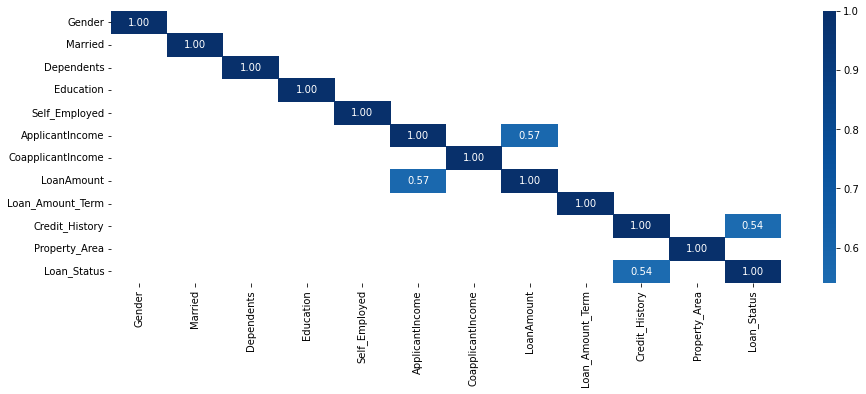

In [ ]:
plt.figure(figsize=(15,5))
corr = df_train.corr()

kot = corr[corr.apply(lambda x: abs(x)>=.4)]

sns.heatmap(kot, annot = True, fmt = '.2f', cmap = 'Blues', center = 0)

### Logistic 

In [ ]:
logistic = LogisticRegression(max_iter=150)

In [ ]:
scoring = ['accuracy', 'precision', 'recall']
cross_validate(logistic, X, y, scoring=scoring)

{'fit_time': array([0.01918292, 0.02569294, 0.0215559 , 0.03308201, 0.03125238]),
 'score_time': array([0.00298715, 0.00288916, 0.00283432, 0.00286674, 0.00815678]),
 'test_accuracy': array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213]),
 'test_precision': array([0.79245283, 0.76851852, 0.76635514, 0.83      , 0.79807692]),
 'test_recall': array([0.98823529, 0.97647059, 0.97619048, 0.98809524, 0.98809524])}

### KNN

In [ ]:
neigh = KNeighborsClassifier()

In [ ]:
scoring = ['accuracy', 'precision', 'recall']
cross_validate(neigh, X, y, scoring=scoring)

{'fit_time': array([0.00526786, 0.00221658, 0.00302505, 0.00244761, 0.00218534]),
 'score_time': array([0.00824022, 0.00888538, 0.01062632, 0.00840664, 0.00779486]),
 'test_accuracy': array([0.7804878 , 0.76422764, 0.76422764, 0.7398374 , 0.73770492]),
 'test_precision': array([0.77358491, 0.75925926, 0.76699029, 0.76      , 0.75      ]),
 'test_recall': array([0.96470588, 0.96470588, 0.94047619, 0.9047619 , 0.92857143])}

### Naive Bayes

In [ ]:
naive = BernoulliNB()

In [ ]:
scoring = ['accuracy', 'precision', 'recall']
cross_validate(naive, X, y, scoring=scoring)

{'fit_time': array([0.00394106, 0.00418711, 0.00460076, 0.00401521, 0.00331926]),
 'score_time': array([0.00497174, 0.00591087, 0.00475097, 0.00470924, 0.0043323 ]),
 'test_accuracy': array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213]),
 'test_precision': array([0.79245283, 0.76851852, 0.76635514, 0.83      , 0.79807692]),
 'test_recall': array([0.98823529, 0.97647059, 0.97619048, 0.98809524, 0.98809524])}

### Decision Tree

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
scoring = ['accuracy', 'precision', 'recall']
cross_validate(tree, X, y, scoring=scoring)

{'fit_time': array([0.00668216, 0.00363159, 0.00344205, 0.00316381, 0.00310564]),
 'score_time': array([0.00581574, 0.00254226, 0.00253844, 0.00251651, 0.00252247]),
 'test_accuracy': array([0.69105691, 0.64227642, 0.71544715, 0.76422764, 0.74590164]),
 'test_precision': array([0.77011494, 0.73033708, 0.7816092 , 0.85714286, 0.81176471]),
 'test_recall': array([0.78823529, 0.76470588, 0.80952381, 0.78571429, 0.82142857])}

## Find Threshold Value

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
logistic.fit(x_train, y_train)

rf_ytrain_pred = logistic.predict_proba(x_train)
print("logistic Train roc-auc:{}".format(roc_auc_score(y_train, rf_ytrain_pred[:,1])))

rf_y_test_pred = logistic.predict_proba(x_test)
print("logistic Test roc-acc:{}".format(roc_auc_score(y_test, rf_y_test_pred[:,1])))

logistic Train roc-auc:0.7752255305835114
logistic Test roc-acc:0.7298717948717949


In [ ]:
neigh.fit(x_train, y_train)

rf_ytrain_pred = neigh.predict_proba(x_train)
print("neigh Train roc-auc:{}".format(roc_auc_score(y_train, rf_ytrain_pred[:,1])))

rf_y_test_pred = neigh.predict_proba(x_test)
print("neigh Test roc-acc:{}".format(roc_auc_score(y_test, rf_y_test_pred[:,1])))

neigh Train roc-auc:0.8875736559420139
neigh Test roc-acc:0.7034615384615385


In [ ]:
naive.fit(x_train, y_train)

rf_ytrain_pred = naive.predict_proba(x_train)
print("naive Train roc-auc:{}".format(roc_auc_score(y_train, rf_ytrain_pred[:,1])))

rf_y_test_pred = naive.predict_proba(x_test)
print("naive Test roc-acc:{}".format(roc_auc_score(y_test, rf_y_test_pred[:,1])))

naive Train roc-auc:0.7907389059811232
naive Test roc-acc:0.7574358974358975


In [ ]:
tree.fit(x_train, y_train)

rf_ytrain_pred = tree.predict_proba(x_train)
print("tree Train roc-auc:{}".format(roc_auc_score(y_train, rf_ytrain_pred[:,1])))

rf_y_test_pred = tree.predict_proba(x_test)
print("tree Test roc-acc:{}".format(roc_auc_score(y_test, rf_y_test_pred[:,1])))

tree Train roc-auc:1.0
tree Test roc-acc:0.6371794871794871


In [ ]:
pred = []

for model in [logistic, naive, tree, neigh]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))

final_pred = pd.concat(pred, axis=1).mean(axis=1)
print("Ensemble test roc-auc:{}".format(roc_auc_score(y_test,final_pred)))

Ensemble test roc-auc:0.7573076923076922


In [ ]:
# Calculate the roc-curve

False_pos_rate, True_pos_rate, threshold = roc_curve(y_test, final_pred)

threshold

array([1.93740226, 0.93740226, 0.93701028, 0.93039632, 0.92967369,
       0.92275148, 0.92246608, 0.91324542, 0.91219901, 0.90495691,
       0.89605071, 0.88541195, 0.88534906, 0.88215383, 0.88151712,
       0.88130831, 0.87869423, 0.87505791, 0.87070064, 0.86724369,
       0.86377289, 0.85747274, 0.85587711, 0.85147657, 0.84758893,
       0.8453302 , 0.84087312, 0.83923095, 0.8383406 , 0.83700588,
       0.83529543, 0.82698284, 0.82429778, 0.82285007, 0.81844643,
       0.81495245, 0.80977345, 0.80791071, 0.80675972, 0.78799996,
       0.78693255, 0.77483185, 0.77168106, 0.67914448, 0.67492673,
       0.63905287, 0.63261799, 0.62085977, 0.62012113, 0.61932103,
       0.61840865, 0.60381805, 0.59321416, 0.56614721, 0.55397883,
       0.55120619, 0.54319746, 0.53328629, 0.53067432, 0.52236888,
       0.47927395, 0.43941397, 0.27894281, 0.21698717, 0.21593392,
       0.21046617, 0.05974205])

In [ ]:
from sklearn.metrics import accuracy_score

acc = []
for thres in threshold:
    y_pred = np.where(final_pred>thres,1,0)
    """
    what ever prediction i am getting and if it is greater than 
    threshold i'll be converting as 1 or i'll keep it as 0.
    """
    acc.append(accuracy_score(y_test,y_pred,normalize=True))
    #Then i'll be computing my accuracy score with my y_test and then
    #append the accuracy inside acc list.

acc = pd.concat([pd.Series(threshold), pd.Series(acc)], axis=1)
acc.columns = ['threshold','accuracy']
acc.sort_values(by="accuracy", ascending=False, inplace = True)
acc.head()

,threshold,accuracy
54,0.553979,0.778378
58,0.530674,0.778378
53,0.566147,0.772973
60,0.479274,0.772973
59,0.522369,0.772973


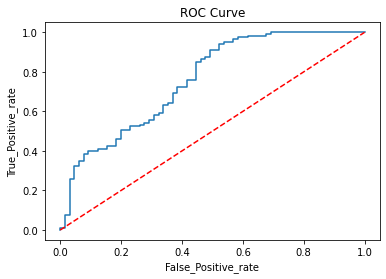

In [ ]:
import matplotlib.pyplot as plt
def plot_roc_curve(False_pos_rate,True_pos_rate):
     plt.plot(False_pos_rate, True_pos_rate, label="ROC")
     plt.plot([0,1],[0,1],color="Red",linestyle="--")
     plt.xlabel("False_Positive_rate")
     plt.ylabel("True_Positive_rate")
     plt.title("ROC Curve")
     plt.legend
     plt.show()

plot_roc_curve(False_pos_rate,True_pos_rate)

In [ ]:
from sklearn.metrics import accuracy_score,\
 confusion_matrix, recall_score, roc_auc_score, precision_score, classification_report

clf = LogisticRegression()
clf.fit(x_train, y_train)

THRESHOLD = 0.50
preds = np.where(clf.predict_proba(x_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), 
                   recall_score(y_test, preds), 
                   precision_score(y_test, preds), 
                   roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.783784
recall,0.983333
precision,0.756410
roc_auc_score,0.699359


In [ ]:
print(classification_report(y_test,preds))


              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



In [ ]:
cf_matrix = confusion_matrix(y_test,preds)
cf_matrix

array([[ 27,  38],
       [  2, 118]])

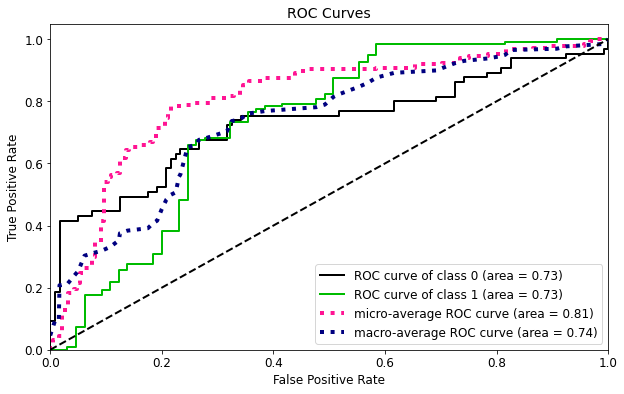

In [ ]:
y_probas = clf.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

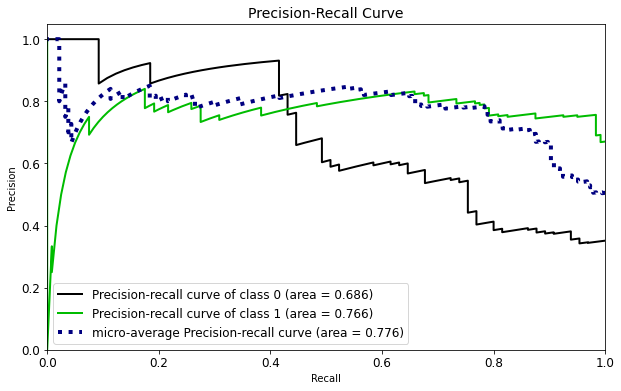

In [ ]:
skplt.metrics.plot_precision_recall(y_test,y_probas,
                                    figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

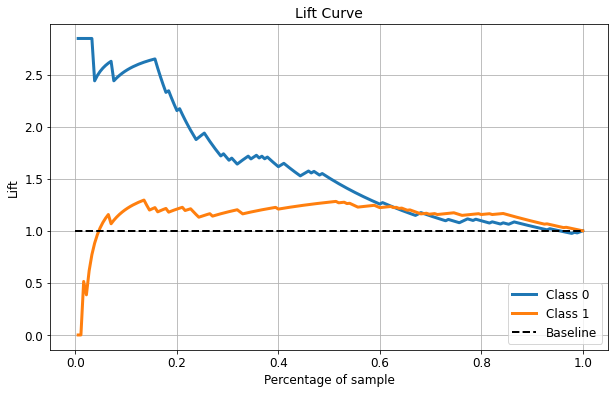

In [ ]:
skplt.metrics.plot_lift_curve(y_test,y_probas,
                              figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

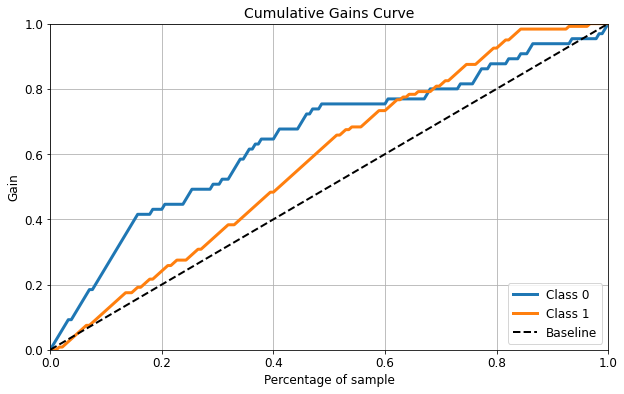

In [ ]:
skplt.metrics.plot_cumulative_gain(y_test,y_probas,
                                   figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

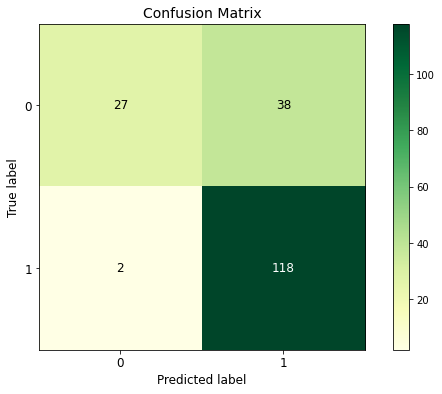

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test,preds,figsize=(10,6),title_fontsize=14,
                                    text_fontsize=12,cmap=plt.cm.YlGn)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


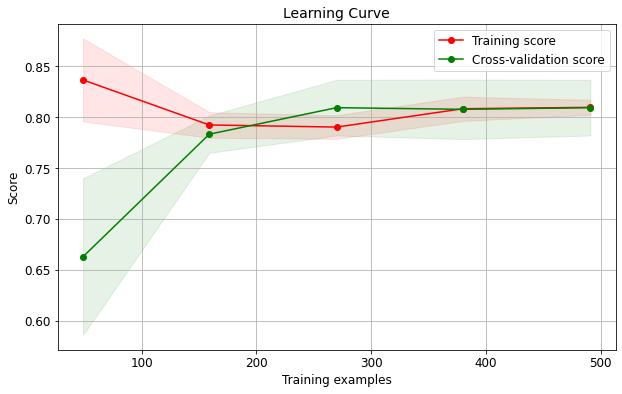

In [ ]:
skplt.estimators.plot_learning_curve(clf, X,y,
                                     figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

## Pipeline

In [ ]:
file_path_train = "/content/drive/MyDrive/Colab Notebooks/Data Sets/Loan_Prediction_train.csv"

df_train_ = pd.read_csv(file_path_train)
df_train_.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
file_path_train = "/content/drive/MyDrive/Colab Notebooks/Data Sets/Loan_Prediction_test.csv"

df_test = pd.read_csv(file_path_train)
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### Create Transformers

In [ ]:
freq_feature = ['Gender', 'Married', 'Dependents', 'Self_Employed', 
                'Loan_Amount_Term', 'Credit_History']
freq_transformer = Pipeline(steps=[
    ("freq_imputer", SimpleImputer(strategy="most_frequent"))
])

mean_feature = ['LoanAmount']
mean_transformer = Pipeline(steps=[
    ('mean_imputer',SimpleImputer(strategy='mean'))
])

categorical_features = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area','Credit_History', 'Loan_Amount_Term']
categorical_transformer = Pipeline(steps=[
    ('scale', OrdinalEncoder())
])

min_max_feature = ['ApplicantIncome', 'CoapplicantIncome']
min_max_transformer = Pipeline(steps=[
    ('min_max', MinMaxScaler()),
])

imputer = ColumnTransformer([
                        ("trf1", freq_transformer, freq_feature),
                        ("trf2", mean_transformer, mean_feature),
                    ], remainder='passthrough')

ordinal_oncoder = ColumnTransformer([
                        ("trf3", categorical_transformer, slice(0,6)),       
                        ("trf4", categorical_transformer, [7,10]),       
                    ], remainder='passthrough')

min_max_scaler = ColumnTransformer([
                        ("trf5", min_max_transformer, slice(8, 11)),
                    ], remainder='passthrough')

model = Pipeline(steps=[
                        ("imputer", imputer),
                        ("ordinal_oncoder", ordinal_oncoder),
                        ("min_max_scaler", min_max_scaler),
                        ('logistic', LogisticRegression())
                ])

In [ ]:
label_encoder = LabelEncoder()

y = label_encoder.fit_transform(df_train_['Loan_Status'])
X = df_train_.drop(['Loan_Status', 'Loan_ID'], axis=1)

X_train,X_test,y_train,y_test = \
                    train_test_split(df_train_.drop(columns=['Loan_Status', 'Loan_ID']), 
                        y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7886178861788617

In [ ]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
350,Male,Yes,0,Graduate,No,9083,0.0,228.0,360.0,1.0,Semiurban
377,Male,Yes,0,Graduate,No,4310,0.0,130.0,360.0,NaN,Semiurban
163,Male,Yes,2,Graduate,No,4167,1447.0,158.0,360.0,1.0,Rural
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
132,Male,No,0,Graduate,No,2718,0.0,70.0,360.0,1.0,Semiurban


In [ ]:
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# export 
import pickle
pickle.dump(model,open('pipe.pkl','wb'))

In [ ]:
Pkl_Filename = 'pipe.pkl'
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

In [ ]:
df_test.iloc[:, 1:].head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
Pickled_LR_Model.fit_transform(df_test.iloc[:, 1:]);
print(Pickled_LR_Model.predict(df_test.iloc[:, 1:]))    

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
